# Steps

* Get batch from the training set.
* Pass batch to network.
* Calculate the loss (difference between the predicted values and the true values).
* Calculate the gradient of the loss function w.r.t the network's weights.
* Update the weights using the gradients to reduce the loss.
* Repeat steps 1-5 until one epoch is completed.
* Repeat steps 1-6 for as many epochs required to reach the minimum loss.

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

torch.set_printoptions(linewidth= 120) # Display options for output
torch.set_grad_enabled(True) # Already on by default


In [3]:
print(torch.__version__)
print(torchvision.__version__)

1.5.0
0.6.0a0+82fd1c8


In [4]:
# Data Extraction and Transformation
train_set = torchvision.datasets.FashionMNIST(
    root='/home/rushank/Desktop/Fashion MNIST Data/FashionMNIST'
    ,train=True
    ,download=True # Downloads just in case mentioned data in not present on mentioned location
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

Extracting /home/rushank/Desktop/Fashion MNIST Data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to /home/rushank/Desktop/Fashion MNIST Data/FashionMNIST/FashionMNIST/raw


Extracting /home/rushank/Desktop/Fashion MNIST Data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /home/rushank/Desktop/Fashion MNIST Data/FashionMNIST/FashionMNIST/raw



Extracting /home/rushank/Desktop/Fashion MNIST Data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /home/rushank/Desktop/Fashion MNIST Data/FashionMNIST/FashionMNIST/raw


Extracting /home/rushank/Desktop/Fashion MNIST Data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /home/rushank/Desktop/Fashion MNIST Data/FashionMNIST/FashionMNIST/raw
Processing...
Done!


/opt/conda/conda-bld/pytorch_1587428190859/work/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [5]:
train_set

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /home/rushank/Desktop/Fashion MNIST Data/FashionMNIST
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [6]:
# Function for calculating correct predictions
def get_num_correct(preds, labels):
    return preds.argmax(dim= 1).eq(labels).sum().item()

In [7]:
# Forming CNN with hidden layers

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) # Convolution layer 1
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5) # Convolution layer 2
        
        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120) # Linear layer 1 [Linear layer also called Fully Connected Layers]
        self.fc2 = nn.Linear(in_features=120, out_features=60) # Linear layer 2
        self.out = nn.Linear(in_features=60, out_features=10) # Linear layer 3 (output layer)
        
    def forward(self, t):
        # input layer
        t=t
        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)
        
        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)
        
        return t

In [8]:
network= Network()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [9]:
train_loader= torch.utils.data.DataLoader(train_set, batch_size= 100)

In [10]:
batch= next(iter(train_loader))
images, labels= batch

## Calculating the Loss 

In [11]:
preds= network(images)
loss= F.cross_entropy(preds, labels) # Calculating the Loss
loss.item()

2.3119497299194336

In [12]:
preds.shape

torch.Size([100, 10])

## Calculating the Gradients 

In [13]:
print(network.conv1.weight.grad) # No gradients till now

None


In [14]:
loss.backward() # CAlculating the gradients

In [15]:
print(network.conv1.weight.grad) # Calculated gradients

tensor([[[[-2.0404e-04, -3.9865e-05,  2.3849e-04,  2.2831e-04,  3.0985e-04],
          [-8.1861e-05, -1.8629e-05,  3.8863e-04,  2.1076e-04,  4.2049e-04],
          [-3.7020e-05,  4.2965e-06,  5.4729e-04,  2.1369e-04,  1.0595e-04],
          [-3.9205e-04, -1.4422e-04,  4.5321e-04,  2.4829e-04,  2.6812e-04],
          [-3.1268e-04, -1.6883e-04,  4.4478e-04,  7.7038e-06, -1.6930e-04]]],


        [[[ 2.3162e-03,  2.9435e-03,  2.4681e-03,  1.5848e-03,  1.4457e-04],
          [ 2.1730e-03,  2.4457e-03,  2.3903e-03,  1.7862e-03,  4.1809e-04],
          [ 2.3324e-03,  2.6674e-03,  2.1680e-03,  8.2832e-04, -4.3457e-04],
          [ 2.2737e-03,  2.7424e-03,  1.8142e-03,  7.0963e-04, -9.8799e-04],
          [ 2.0283e-03,  2.1698e-03,  1.0713e-03,  1.8044e-04, -1.4758e-03]]],


        [[[-1.2460e-04, -1.9189e-04,  2.3675e-04,  1.4626e-04,  2.2907e-04],
          [-1.5835e-04, -1.0261e-04,  1.4659e-04,  8.3509e-06,  1.7421e-04],
          [-2.1820e-04, -1.2672e-04,  2.0144e-05, -4.3976e-05,  8.26

In [16]:
network.conv1.weight.grad.shape

torch.Size([6, 1, 5, 5])

## Upadating the Weights 

In [17]:
optimizer= optim.Adam(network.parameters(), lr= 0.01)
# In place of "Adam", "SGD" can also be used
# "network.parameters()" passes the parameters of network to the optim operation (for updating weights)
# "lr" is the learning rate, its a hyperparameter (can be tuned)

In [18]:
loss.item()

2.3119497299194336

In [19]:
get_num_correct(preds, labels)

9

In [20]:
optimizer.step() # Updating the weights

In [21]:
# Passing images again to network and calculating new loss
preds= network(images)
loss= F.cross_entropy(preds, labels) # Calculating the Loss

In [22]:
loss.item()

2.2772274017333984

In [23]:
# Calculating number of correct predictions again
get_num_correct(preds, labels)
# Should increase

15

# Summarizing the Process of Training the Neural Network into a single block of code

### Training with a single batch 

In [24]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

batch = next(iter(train_loader)) # Get Batch
images, labels = batch

preds = network(images) # Pass Batch
loss = F.cross_entropy(preds, labels) # Calculate Loss

loss.backward() # Calculate Gradients
optimizer.step() # Update Weights

print('loss1:', loss.item())
preds = network(images)
loss = F.cross_entropy(preds, labels)
print('loss2:', loss.item())

loss1: 2.3195323944091797
loss2: 2.297626256942749


## Training with all batchs: A single epoch 

In [25]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

total_loss = 0
total_correct = 0

for batch in train_loader: # Get Batch
    images, labels = batch 

    preds = network(images) # Pass Batch
    loss = F.cross_entropy(preds, labels) # Calculate Loss

    optimizer.zero_grad() # To clear all previous gradients, elz Pytorch will keep summing up with old grads
    loss.backward() # Calculate Gradients
    optimizer.step() # Update Weights

    total_loss += loss.item()
    total_correct += get_num_correct(preds, labels)
    
print("epoch:", 0, "total_correct:", total_correct, "loss:", total_loss)

epoch: 0 total_correct: 47805 loss: 325.14376163482666


In [26]:
accuracy= (total_correct/len(train_set))*100
print('Accuracy=' + str(accuracy) + '%')

Accuracy=79.675%


## The Complete Training Loop: Training Multiple epochs 

In [27]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

for epoch in range(10):
    
    total_loss = 0
    total_correct = 0
    
    for batch in train_loader: # Get Batch
        images, labels = batch 

        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print("epoch", epoch, "total_correct:", total_correct, "loss:", total_loss)

epoch 0 total_correct: 47051 loss: 342.43657395243645
epoch 1 total_correct: 51506 loss: 232.16842697560787
epoch 2 total_correct: 52105 loss: 214.34335424005985
epoch 3 total_correct: 52461 loss: 205.00753237307072
epoch 4 total_correct: 52694 loss: 197.01944544911385
epoch 5 total_correct: 52819 loss: 194.6508020311594
epoch 6 total_correct: 52928 loss: 192.2754736840725
epoch 7 total_correct: 53120 loss: 187.0188715532422
epoch 8 total_correct: 53210 loss: 185.42025192081928
epoch 9 total_correct: 53192 loss: 185.68131326138973


In [28]:
accuracy_post10epochs= (total_correct/len(train_set))*100
print('Accuracy=' + str(accuracy_post10epochs) + '%')

Accuracy=88.65333333333332%


# Analyzing the CNN result- Confusion Matrix

In [29]:
len(train_set)

60000

In [30]:
len(train_set.targets)

60000

### Get Predictions For The Entire Training Set 

In [31]:
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images, labels = batch

        preds = model(images)
        all_preds = torch.cat(
            (all_preds, preds)
            ,dim=0
        )
    return all_preds

In [32]:
prediction_loader= torch.utils.data.DataLoader(train_set, batch_size= 10000)
train_preds= get_all_preds(network, prediction_loader)

In [33]:
train_preds.shape

torch.Size([60000, 10])

In [34]:
print(train_preds.requires_grad) # To check weather train_preds require grad or not

True


In [35]:
preds_correct= get_num_correct(train_preds, train_set.targets)

print('total correct:', preds_correct)
print('accuracy:', preds_correct / len(train_set))

total correct: 52647
accuracy: 0.87745


### Building the Confusion Matrix 

In [36]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [37]:
train_preds.argmax(dim= 1)

tensor([9, 0, 0,  ..., 3, 0, 5], grad_fn=<NotImplemented>)

In [38]:
stacked = torch.stack(
    (train_set.targets, train_preds.argmax(dim=1)),dim=1)

In [39]:
stacked.shape # Let's stack these two tensors along the second dimension so we can have 60,000 ordered pairs.

torch.Size([60000, 2])

In [40]:
stacked

tensor([[9, 9],
        [0, 0],
        [0, 0],
        ...,
        [3, 3],
        [0, 0],
        [5, 5]], grad_fn=<StackBackward>)

In [41]:
# Accessing within the stacked
stacked[0].tolist()

[9, 9]

In [42]:
# Unpacking the stacked
j, k= stacked[0].tolist()

In [43]:
j

9

In [44]:
k

9

In [45]:
# Creating Confusion matrix
cmt= torch.zeros(10, 10, dtype= torch.int32)
cmt

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=torch.int32)

In [46]:
# t1= true label; p1= predicted label
# t1=j, p1=k
for p in stacked:
    tl, pl = p.tolist()
    cmt[tl, pl] = cmt[tl, pl] + 1

In [47]:
# cmt complete by above operation
cmt

tensor([[5592,   23,   26,   62,   13,    2,  233,    1,   48,    0],
        [  12, 5917,    1,   53,    5,    0,    8,    0,    4,    0],
        [ 145,   12, 4518,   61,  876,    0,  287,    1,   99,    1],
        [ 388,   76,    5, 5206,  209,    3,   95,    1,   17,    0],
        [  14,   10,  238,  167, 5424,    1,  105,    2,   39,    0],
        [   1,    0,    0,    0,    0, 5735,    0,  174,   12,   78],
        [1491,   16,  342,   79, 1162,    0, 2748,    2,  160,    0],
        [   0,    0,    0,    0,    0,   30,    0, 5832,    4,  134],
        [  18,    7,    7,   12,   18,    5,   26,   11, 5894,    2],
        [   0,    0,    0,    0,    0,    4,    0,  210,    5, 5781]], dtype=torch.int32)

### Ploting Heatmap for the calculated confusion matrix

In [48]:
# Function to plot heatmap
import numpy as np
import matplotlib.pyplot as plt
import itertools as itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
tensor([[5592,   23,   26,   62,   13,    2,  233,    1,   48,    0],
        [  12, 5917,    1,   53,    5,    0,    8,    0,    4,    0],
        [ 145,   12, 4518,   61,  876,    0,  287,    1,   99,    1],
        [ 388,   76,    5, 5206,  209,    3,   95,    1,   17,    0],
        [  14,   10,  238,  167, 5424,    1,  105,    2,   39,    0],
        [   1,    0,    0,    0,    0, 5735,    0,  174,   12,   78],
        [1491,   16,  342,   79, 1162,    0, 2748,    2,  160,    0],
        [   0,    0,    0,    0,    0,   30,    0, 5832,    4,  134],
        [  18,    7,    7,   12,   18,    5,   26,   11, 5894,    2],
        [   0,    0,    0,    0,    0,    4,    0,  210,    5, 5781]], dtype=torch.int32)


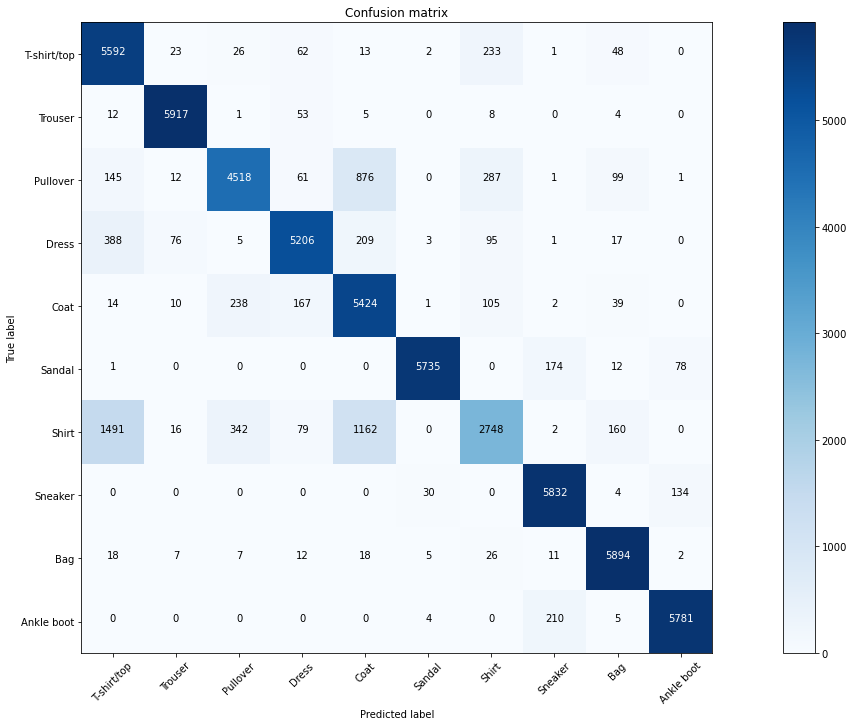

In [49]:
names= ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')
plt.figure(figsize=(20, 10))

plot_confusion_matrix(cmt, names)